In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file=pd.read_csv("heart.csv")

In [5]:
file.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
import seaborn as sns

In [7]:
file.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

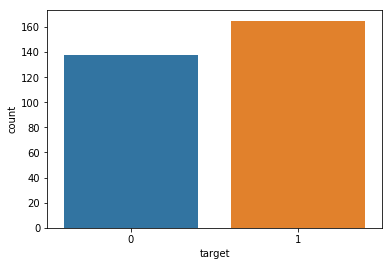

In [9]:
sns.countplot(file["target"])

In [10]:
file.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

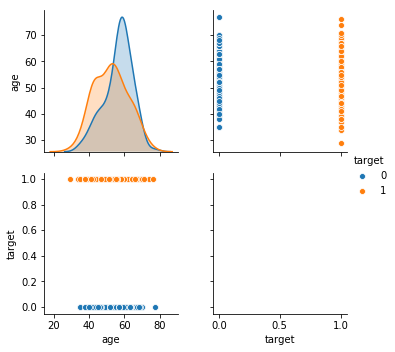

In [11]:
sns.pairplot(file,vars=["age","target"],hue="target")

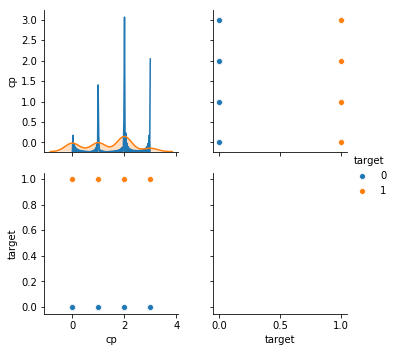

In [12]:
sns.pairplot(file,vars=["cp","target"],hue="target")

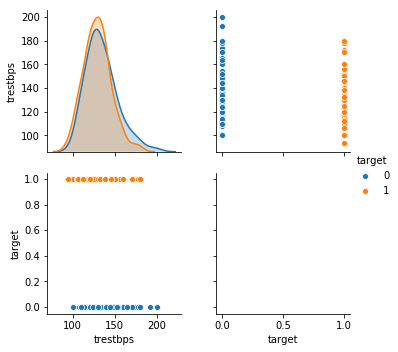

In [13]:
sns.pairplot(file,vars=["trestbps","target"],hue="target")

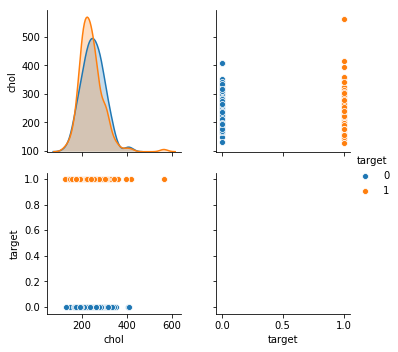

In [14]:
sns.pairplot(file,vars=["chol","target"],hue="target")

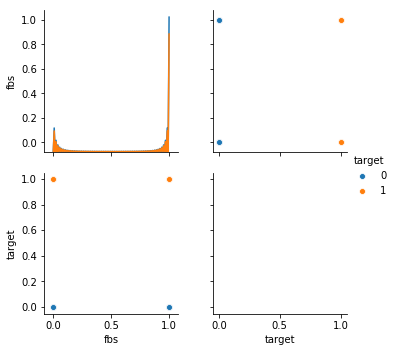

In [15]:
sns.pairplot(file,vars=["fbs","target"],hue="target")

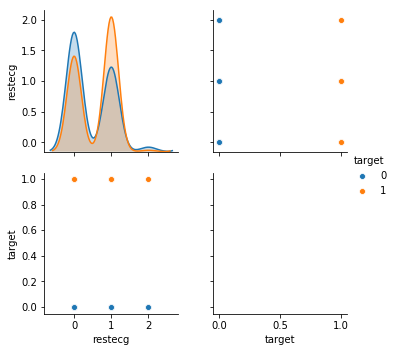

In [16]:
sns.pairplot(file,vars=["restecg","target"],hue="target")

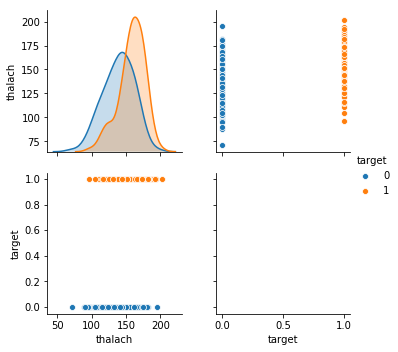

In [17]:
sns.pairplot(file,vars=["thalach","target"],hue="target")

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
X=file.iloc[:,0:13]

In [21]:
y=file.iloc[:,13]

In [23]:
forest=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=200)

In [25]:
model=forest.fit(X,y)

In [27]:
importance=model.feature_importances_

In [29]:
importance=pd.DataFrame(importance)

In [32]:
col=pd.DataFrame(file.columns)

In [35]:
feature_imp=pd.concat([importance,col],axis=1)

In [46]:
feature_imp.rename(columns={"0":"values","0":"features"},inplace=True)

In [49]:
feature_imp.columns=["values","features"]

In [51]:
feature_imp.columns

Index(['values', 'features'], dtype='object')

In [52]:
feature_imp.sort_values(by=["values"])

,values,features
5,0.010231,fbs
6,0.022860,restecg
1,0.036902,sex
8,0.046370,exang
10,0.065399,slope
3,0.073946,trestbps
0,0.077531,age
4,0.078638,chol
9,0.092333,oldpeak
12,0.104386,thal


<BarContainer object of 14 artists>

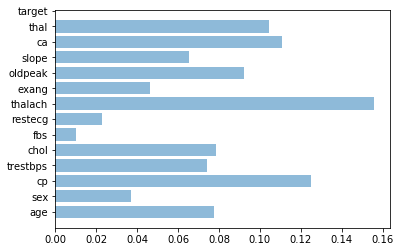

In [59]:
plt.barh(feature_imp["features"],feature_imp["values"],alpha=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


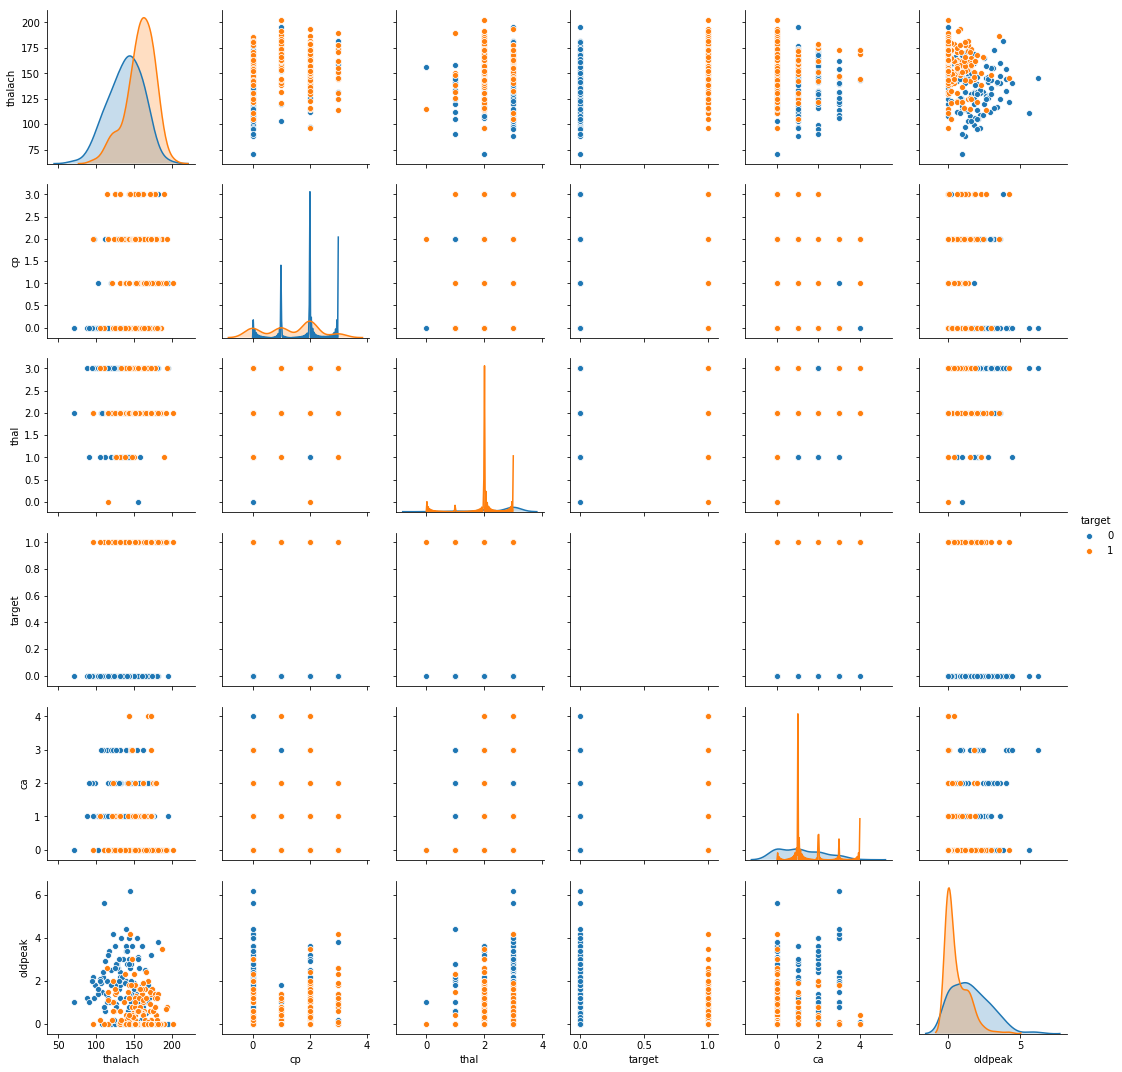

In [55]:
sns.pairplot(file,vars=["thalach","cp","thal","target","ca","oldpeak"],hue="target")

In [60]:
from sklearn.svm import SVC

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [64]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid=[{"kernel":["rbf"],"C":[0.001,0.01,0.1,1,10,100,1000],"gamma":[0.001,0.01,0.1,1,10,100,1000]},{"kernel":["linear"],"C":[0.001,0.01,0.1,1,10,100,1000]}]

In [81]:
grid=GridSearchCV(SVC( probability=True),param_grid=param_grid,cv=5,n_jobs=-1)

In [82]:
model=grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [83]:
from sklearn.metrics import classification_report

In [84]:
print("best parameters",model.best_params_)

best parameters {'C': 0.1, 'kernel': 'linear'}


In [85]:
print("best score",model.best_score_)

best score 0.8193832599118943


In [86]:
target_pred=model.predict(X_test)

In [87]:
print(classification_report(y_test,target_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

   micro avg       0.87      0.87      0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [95]:
from sklearn.metrics import roc_curve,roc_auc_score

In [91]:
target_prob=model.predict_proba(X_test)[:,1]

In [96]:
false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,target_pred)

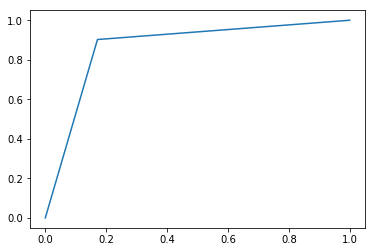

In [97]:
plt.plot(false_positive_rate,true_positive_rate)


In [98]:
roc_auc_score(y_test,target_pred)

0.865505226480836

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(y_test,target_pred)

array([[29,  6],
       [ 4, 37]], dtype=int64)